In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/')

In [3]:
trace_a = pickle.load(open('earm_dreamzs_3chain_a_psostart.p'))
trace_b = pickle.load(open('earm_dreamzs_3chain_b_psostart.p'))
trace_c = pickle.load(open('earm_dreamzs_3chain_c_psostart.p'))
trace_d = pickle.load(open('earm_dreamzs_3chain_d_psostart.p'))

In [4]:
trace_a_error = {}
trace_b_error = {}
trace_c_error = {}
trace_d_error = {}
for key in ['momp', 'icrp', 'ecrp']:
    trace_a_error[key] = trace_a[key]
    trace_b_error[key] = trace_b[key]
    trace_c_error[key] = trace_c[key]
    trace_d_error[key] = trace_d[key]

In [5]:
for key in ['momp', 'icrp', 'ecrp']:
    del trace_a[key]
    del trace_b[key]
    del trace_c[key]
    del trace_d[key]

In [6]:
param_trace_a = convert_param_vec_dict_to_param_dict(trace_a, model.parameters_rules())
param_trace_b = convert_param_vec_dict_to_param_dict(trace_b, model.parameters_rules())
param_trace_c = convert_param_vec_dict_to_param_dict(trace_c, model.parameters_rules())
param_trace_d = convert_param_vec_dict_to_param_dict(trace_d, model.parameters_rules())

In [7]:
os.chdir('/home/shockle/moo_and_mcmc/emcee/')

In [8]:
from earm_uniform_emcee import log_post

In [9]:
for trace in [trace_a, trace_b, trace_c, trace_d]:
    for chain in range(len(trace_a['params'])):
        log_post(trace['params'][chain][-1])

prior:  -282.479411206  like:  -1001.32219057  post:  -1283.80160177
prior:  -282.479411206  like:  -991.905071474  post:  -1274.38448268
prior:  -282.479411206  like:  -993.898526289  post:  -1276.37793749
prior:  -282.479411206  like:  -1076.14103016  post:  -1358.62044137
prior:  -282.479411206  like:  -1055.44273207  post:  -1337.92214328
prior:  -282.479411206  like:  -1055.4928291  post:  -1337.97224031
prior:  -282.479411206  like:  -904.01592604  post:  -1186.49533725
prior:  -282.479411206  like:  -894.425079968  post:  -1176.90449117
prior:  -282.479411206  like:  -884.403776114  post:  -1166.88318732
prior:  -282.479411206  like:  -1067.59638699  post:  -1350.0757982
prior:  -282.479411206  like:  -1066.78688217  post:  -1349.26629337
prior:  -282.479411206  like:  -1033.06014842  post:  -1315.53955962


In [10]:
print_convergence_summary(param_trace_a)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  101  of  105  parameters.
Percent of parameters with GR below 1.1:  96.1904761905


[105, 100.0, 101, 96.19047619047619]

In [11]:
print_convergence_summary(param_trace_b)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

In [12]:
print_convergence_summary(param_trace_c)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

In [13]:
print_convergence_summary(param_trace_d)

Number of parameters with GR below 1.2:  78  of  105  parameters.
Percent of parameters with GR below 1.2:  74.2857142857
Number of parameters with GR below 1.1:  56  of  105  parameters.
Percent of parameters with GR below 1.1:  53.3333333333


[78, 74.28571428571429, 56, 53.333333333333336]

60000
3
60000


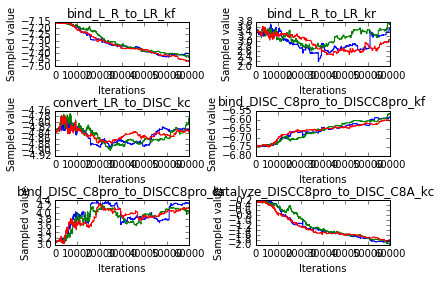

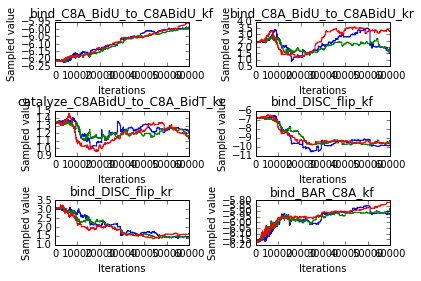

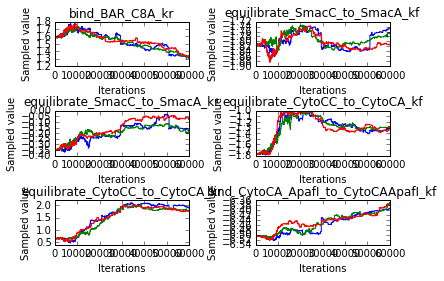

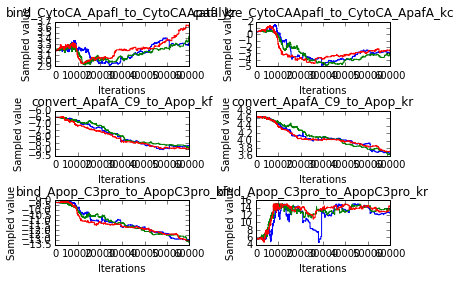

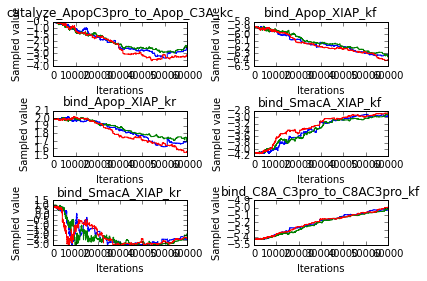

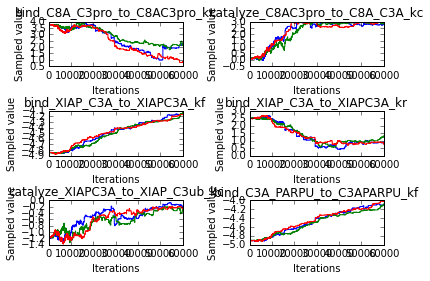

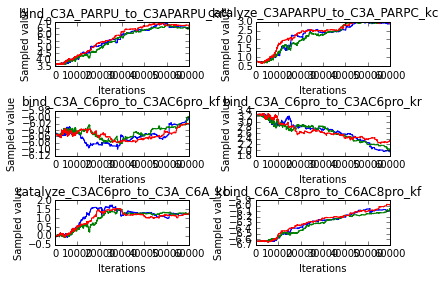

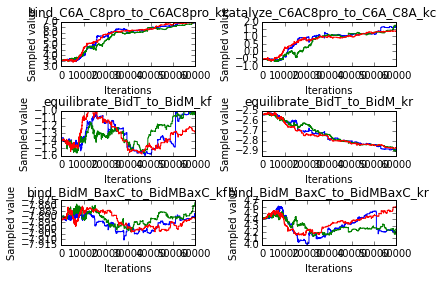

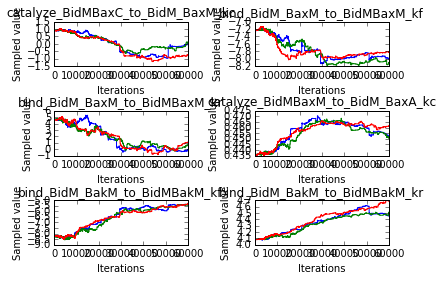

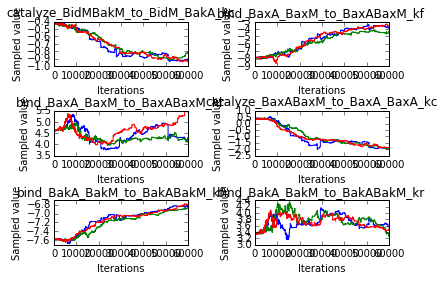

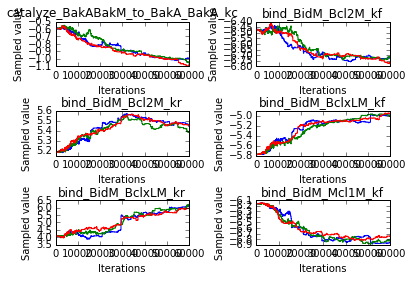

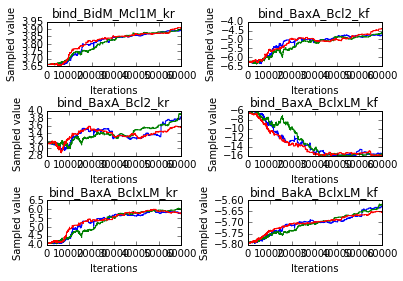

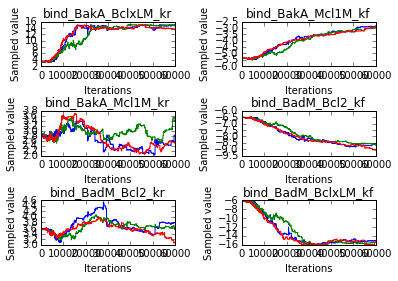

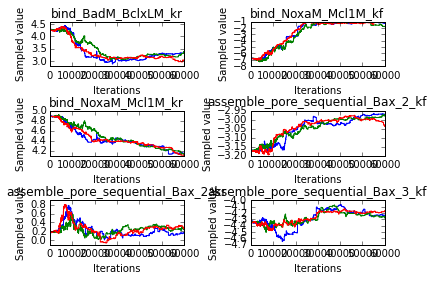

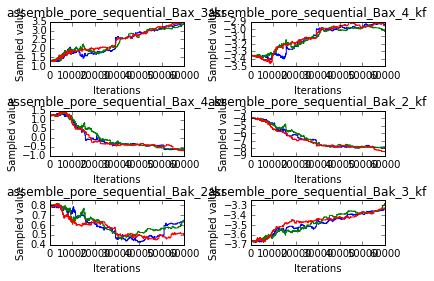

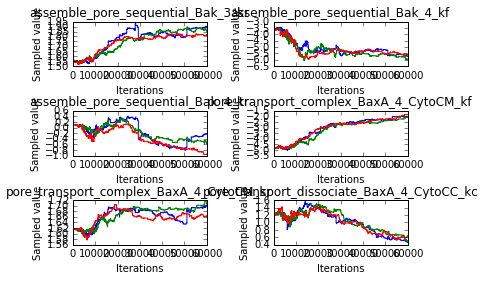

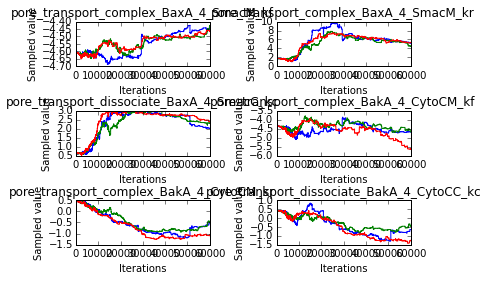

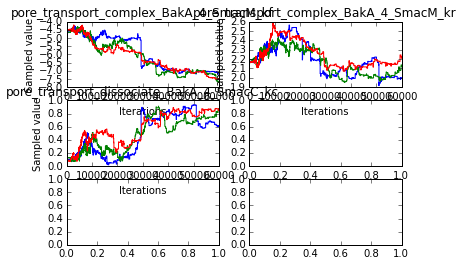

In [14]:
sample_plots(param_trace_a)

In [15]:
trace_arr_a = create_trace_matrix(param_trace_a, burnin=50000)
trace_arr_b = create_trace_matrix(param_trace_b, burnin=50000)
trace_arr_c = create_trace_matrix(param_trace_c, burnin=50000)
trace_arr_d = create_trace_matrix(param_trace_d, burnin=50000)

In [16]:
np.save('earm_dreamzs_3chain_psostart_a_tracearr.npy', trace_arr_a)
np.save('earm_dreamzs_3chain_psostart_b_tracearr.npy', trace_arr_b)
np.save('earm_dreamzs_3chain_psostart_c_tracearr.npy', trace_arr_c)
np.save('earm_dreamzs_3chain_psostart_d_tracearr.npy', trace_arr_d)

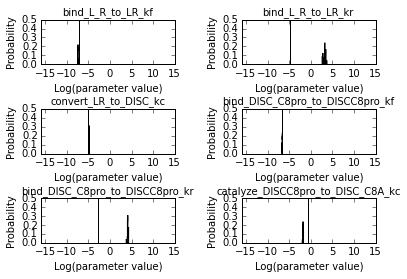

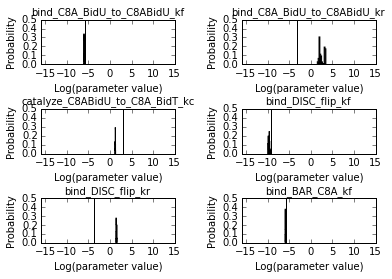

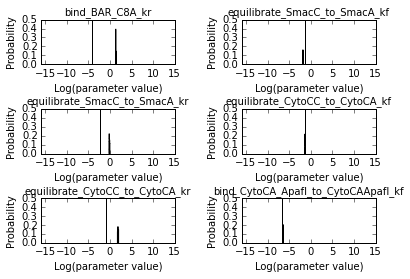

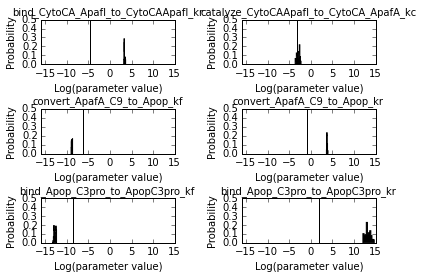

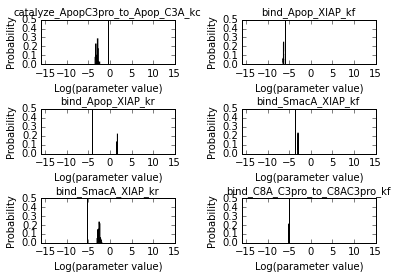

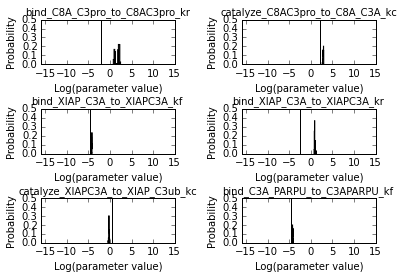

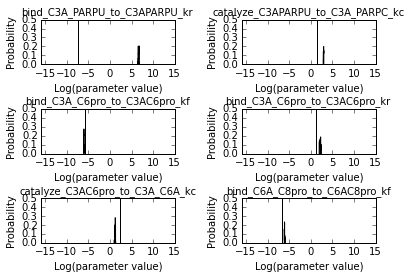

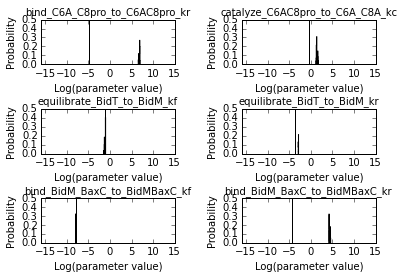

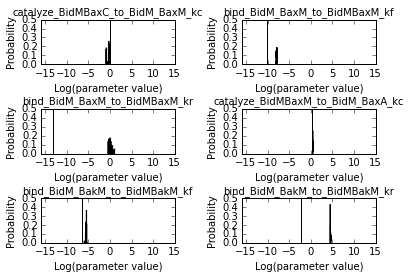

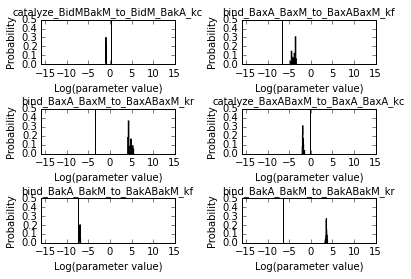

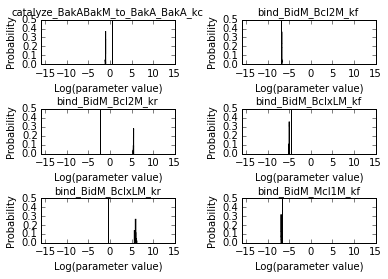

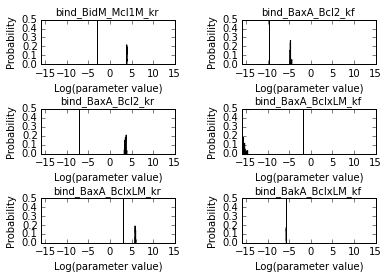

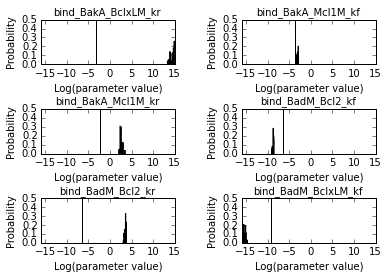

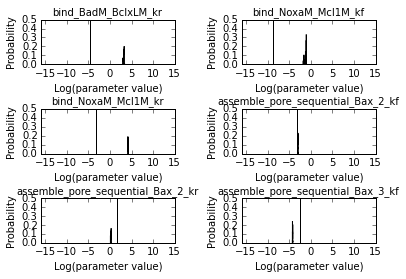

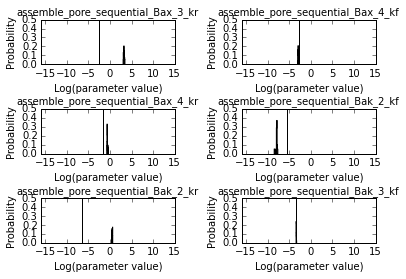

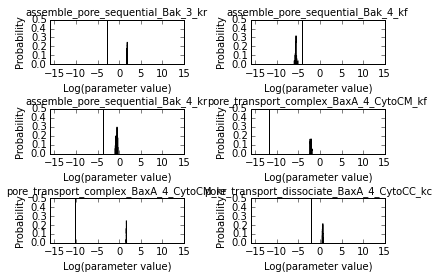

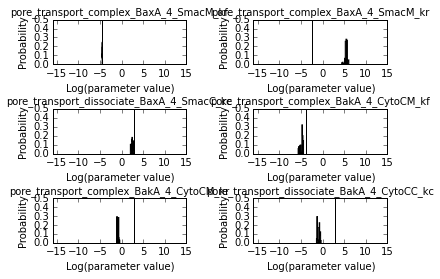

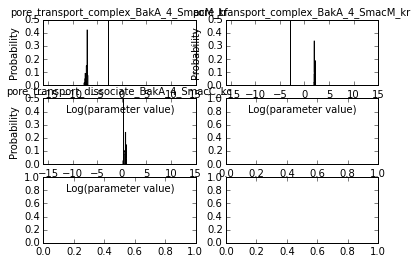

In [17]:
plot_histograms(param_trace_a, trace_arr_a, plot_original_vals=True, model=model, title_fontsize=10)